### Bigmart Sales Analysis

# Importing necessary Librarys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# Loading DataSet

In [3]:
df=pd.read_csv(r"C:\Users\Hari\Documents\Projects\ML\MainProjects\Big_Mart_Sales_Prediction\train.csv")

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Checking the datatypes of each features

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Now will check for duplicated values

In [5]:
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Checking the shape of the dataframe

In [6]:
df.shape

(8523, 12)

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
for i in df.columns:
    print("feature = ",i)
    print("Unique Elements are = ",df[i].unique())
    print("Count of Unique elements are = ",df[i].nunique(),"\n")
    print("==============================================================================================","\n")

feature =  Item_Identifier
Unique Elements are =  ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Count of Unique elements are =  1559 


feature =  Item_Weight
Unique Elements are =  [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   1

# The data preprocessing steps need to be Done 
    - the Item_Visibility should not be having 0 as its minimum
    - In Item_Fat_Content we have only 2 levels but due to typoerror we have 5 levels
    - In Item_Identifier we can take only starting 2 char and will use for prediction
    - will convert Outlet_Establishment_Year to the age of the store establishment

# Will check for missing values

In [11]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
miss_val=df.isna().sum()
miss_val[miss_val>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

# will treat the missing values 1)Item_Weight 

    - will fill the Item_Weight based on the mean by grouping with the Item_Identifier so that the treatement of 
      missing values will be more efficient

In [13]:
df.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [14]:
df.Item_Identifier.value_counts()['DRA12']

6

In [15]:
df[df['Item_Identifier']=='DRA12']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308


In [16]:
df.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [17]:
grouped_Item_Weight=df.pivot_table(values='Item_Weight',index='Item_Identifier')
grouped_Item_Weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


## Example Summary:
    - If you only need the mean 'Item_Weight' for each 'Item_Identifier' and want a Series output, 
    use ----> df.groupby('Item_Identifier')['Item_Weight'].mean().
    - If you want to create a DataFrame that presents the mean 'Item_Weight' for each 'Item_Identifier', 
    use ----> df.pivot_table(values='Item_Weight', index='Item_Identifier').

In [18]:
df[df['Item_Weight'].isnull()].index

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [19]:
# now will find the missing data in the Item_Weight column

miss_idx=df[df['Item_Weight'].isnull()].index
miss_idx

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [20]:
miss_idx

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [21]:
df.Item_Identifier

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [22]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
for i,item in enumerate(df.Item_Identifier):
    if i in miss_idx:
        if item in grouped_Item_Weight.index:
            df['Item_Weight'][i]=grouped_Item_Weight.loc[item]['Item_Weight']

In [24]:
df['Item_Weight'].isnull().sum()

4

In [25]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [26]:
df[df['Item_Identifier']=='FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [27]:
df[df['Item_Identifier']=='FDK57']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


In [28]:
df[df['Item_Identifier']=='FDE52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046


In [29]:
df[df['Item_Identifier']=='FDQ60']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [30]:
df[df['Item_Identifier']=='DRA12']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308


the item identifiers FDN52, FDK57, FDE52, and FDQ60 are having single item identifiers so it is difficult to fill with some values, thats why im dropping those columns

In [31]:
df.drop([927,1922,4187,5022],inplace=True)

In [32]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# will treat the missing values 2)Outlet_Size 

In [33]:
miss_idx[miss_idx==92]

Int64Index([], dtype='int64')

In [34]:
# now will impute the missing values which are present in the Outlet_Size by taking the mode because its a categorical variable

grouped_Outlet_Size=df.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x:x.mode()))
grouped_Outlet_Size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [35]:
miss_idx_Outlet_Size=df[df['Outlet_Size'].isnull()].index
miss_idx_Outlet_Size

Int64Index([   3,    8,    9,   25,   28,   30,   33,   45,   46,   47,
            ...
            8493, 8494, 8496, 8500, 8501, 8502, 8508, 8509, 8514, 8519],
           dtype='int64', length=2410)

In [36]:
df['Outlet_Size'].isnull().sum()

2410

In [37]:
for i,item in enumerate(df.Outlet_Type):
    if i in miss_idx_Outlet_Size:
        if item in grouped_Outlet_Size.index:
            df['Outlet_Size'][i]=grouped_Outlet_Size.loc[item]['Outlet_Size']

In [38]:
df['Outlet_Size'].isnull().sum()

1

In [39]:
df[df['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.157,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.285


In [40]:
df.drop([8519],inplace=True)

# Now will modify item visibility because we cannot have 0 in item visibility

In [41]:
# Now we are going to impute the 0 values in Item_Visibility with the mean of it 

mean_Item_Visibility=round(df['Item_Visibility'].mean(),6)
mean_Item_Visibility

0.066115

In [42]:
idx=df[df['Item_Visibility']==0].index
idx

Int64Index([   3,    4,    5,   10,   32,   33,   46,   60,   72,   79,
            ...
            8410, 8425, 8435, 8439, 8467, 8480, 8484, 8486, 8494, 8500],
           dtype='int64', length=526)

In [43]:
df[df['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,7.315,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,Medium,Tier 2,Supermarket Type1,1637.8680


In [44]:
# Now will try to replace with mean of item_visibility where ever you can find item_visibility = 0
df['Item_Visibility'] = df.Item_Visibility.apply(lambda x : mean_Item_Visibility if x == 0 else x)

In [45]:
df[df['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Will work on the typo error in the Item_Fat_Content

In [46]:
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2885
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [47]:
# Now will replace the data accourdingly
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [48]:
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3002
Name: Item_Fat_Content, dtype: int64

# Now will take only 2 char from the Item_Identifier
    - In Item_Identifier we can take only starting 2 char and will use for prediction

In [49]:
df['New_Item_Identifier']=df['Item_Identifier'].apply(lambda x : x[0:2])

In [50]:
df['New_Item_Identifier'].value_counts()

FD    6120
NC    1599
DR     799
Name: New_Item_Identifier, dtype: int64

In [51]:
df.Item_Fat_Content.value_counts()

Low Fat    5516
Regular    3002
Name: Item_Fat_Content, dtype: int64

In [52]:
# Now will replace the data where ever we having the NC in the New_Item_Identifier the Item_Fat_Content should be others

df.loc[df['New_Item_Identifier']=='NC','Item_Fat_Content']='others'

In [53]:
df['Item_Fat_Content'].value_counts()

Low Fat    3917
Regular    3002
others     1599
Name: Item_Fat_Content, dtype: int64

## converting Outlet_Establishment_Year to the age of the store

In [54]:
# We have collected the data from year 2013 so we are subtracting outlet Estiablishment year with 2013
df['age_of_store']=2013-df.Outlet_Establishment_Year

In [55]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14


# Data Visualization

In [56]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Identifier',
       'age_of_store'],
      dtype='object')

# Data Visualization

### Univariate Plots
lets look at the countplots for categorial data

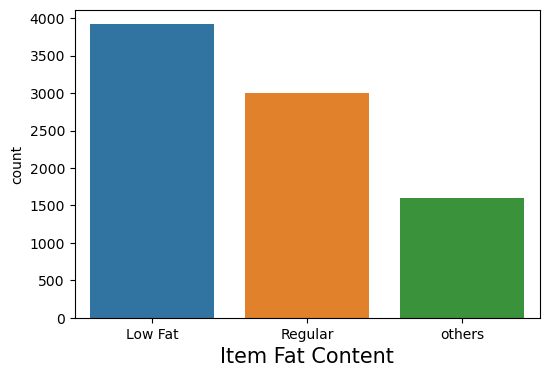

In [57]:
# Categorial Data
['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type', 'Item_Type', 'Item_Type_Combined' ]

# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

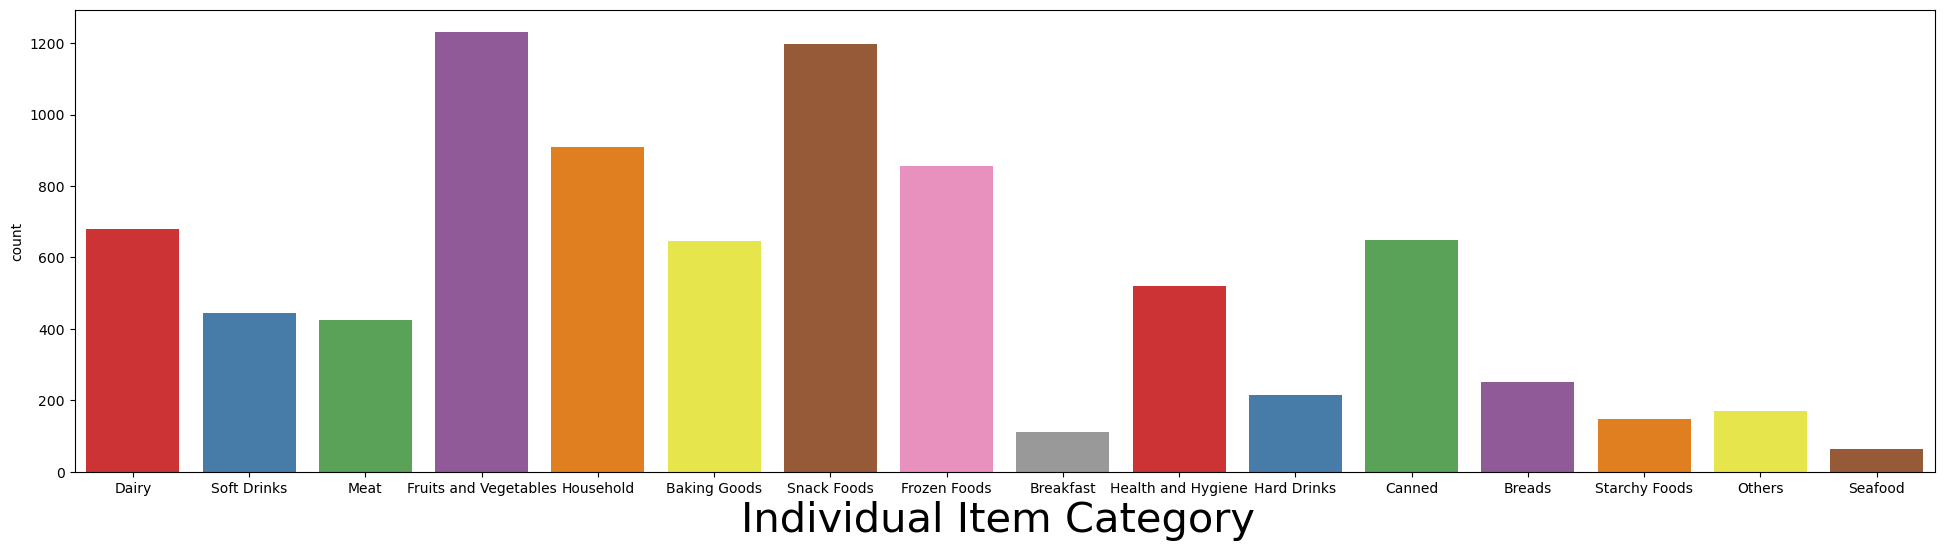

In [58]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

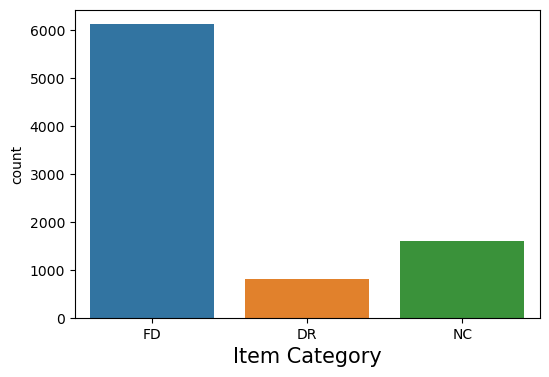

In [59]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='New_Item_Identifier')
plt.xlabel('Item Category', fontsize=15)
plt.show()

Food, Drinks and NON-Consumable

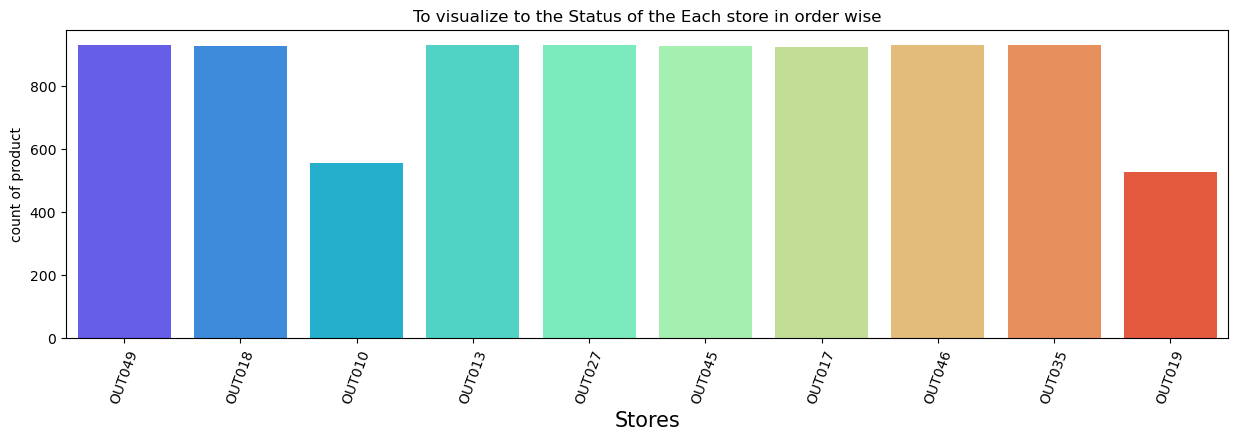

In [60]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='Outlet_Identifier',palette="rainbow")
plt.xlabel('Stores', fontsize=15)
plt.ylabel('count of product')
plt.xticks(rotation=70)
plt.title("To visualize to the Status of the Each store in order wise") 
plt.show()

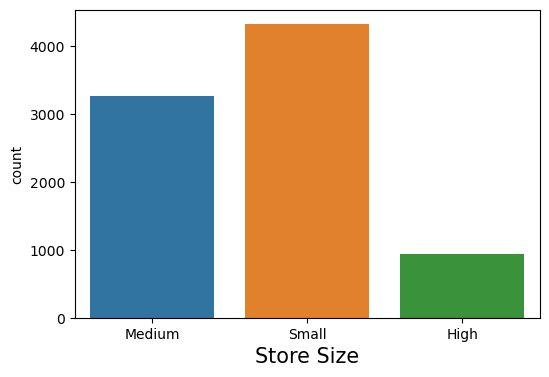

In [61]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

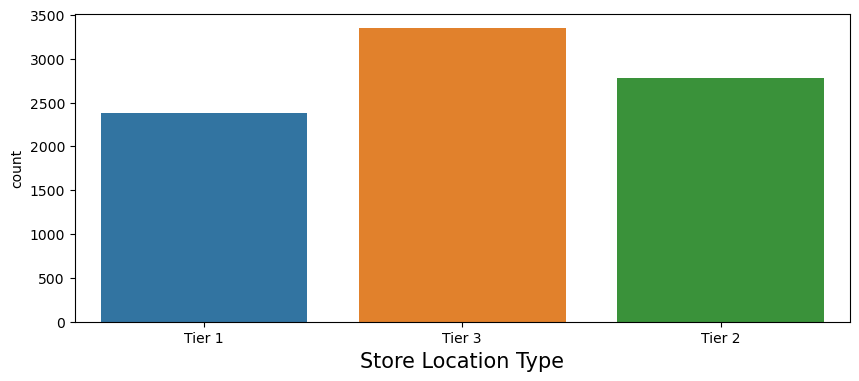

In [62]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

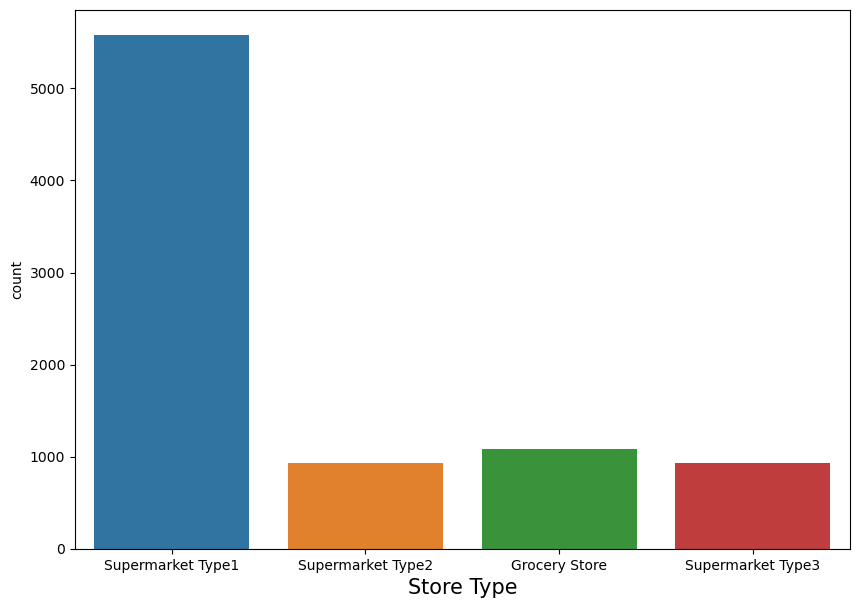

In [63]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

## Realizations
    - Item_Fat_Content: Most Items sold are low Fat.
    - Item_Type: Distictly fruits & veg, food snacks are popular.
    - Item_Type_Combined: Most Sold Item cateogory is food.
    - Outlet_Identifier: Sold items are ditributed evenly amoung all stores, execpt OUT010 and OUT019.
    - Outlet_Size: Bigmart Stores are mostly in medium size in this data.
    - Outlet_Location_Type: Most comon type of location is Tier3
    - Outlet_Type: By a wide mergin Most Store Types are SuperMarket Type1.

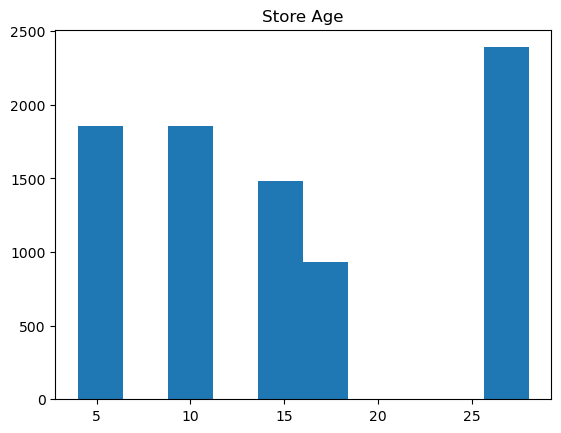

In [64]:
# For Numerical Data

# HistPlot for Outlet_Age
plt.hist(x=df['age_of_store'], )
plt.title('Store Age')
plt.show()

## Realizations
    - Outlet_Age: Most Common Outlets are 35 year's old.

## Bivariate plots For Numeric.
    - Let's check following relationships
        - Sales per Item_MRP
        - Sales per Item_Visibility
        - Sales per Item_Weight

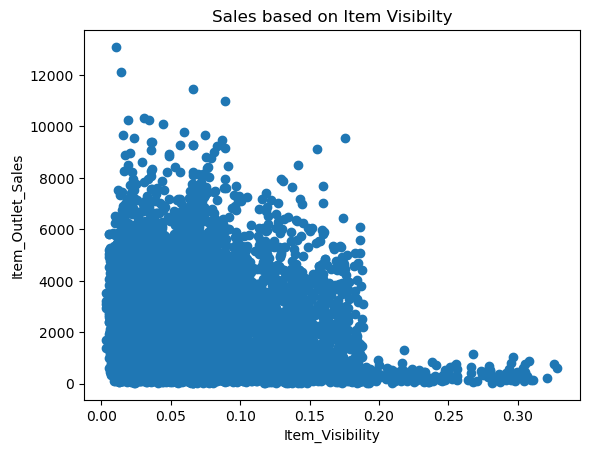

In [65]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

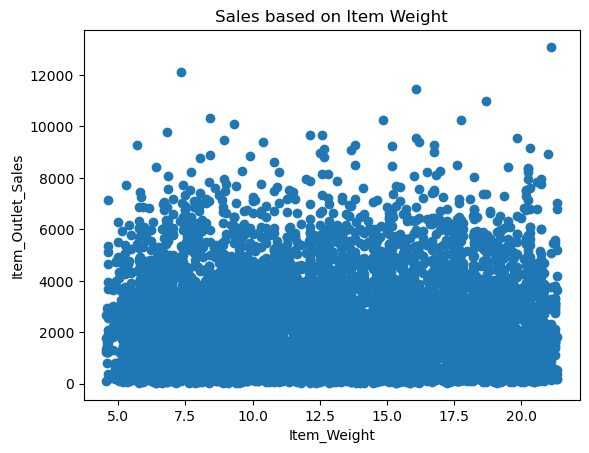

In [66]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

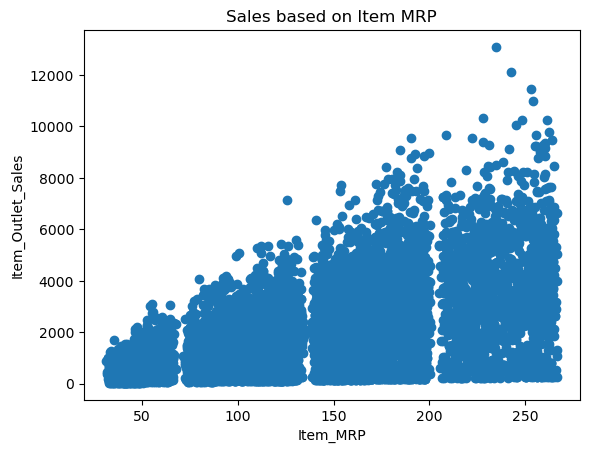

In [67]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

## Realizations
    - Item_Visibility: Looks like it has negative correlation.
    - Item_Weight: Not a particular Pattern, Data is very spreaded.
    - Item_MRP: Items with higer MRP Sales tends to sell better.

## Bivariate plots For Categorical.
    - Let's check following relationships
        - Sales per Item_Type_Combined
        - Sales per Outlet_Identifier
        - Sales per Outlet_Type
        - Sales per Outlet_Size
        - Sales per Outlet_Location_Type

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


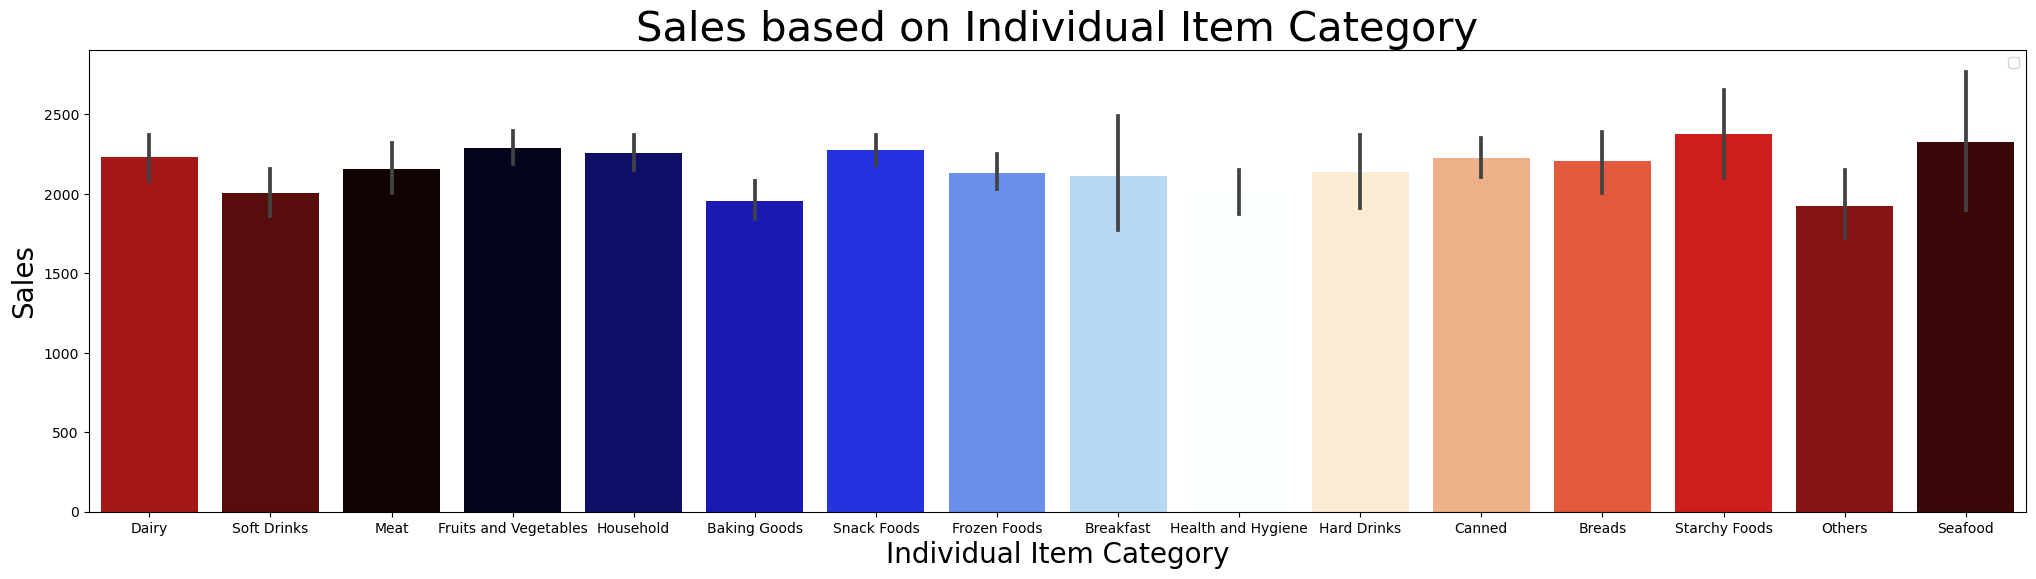

In [68]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=df,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


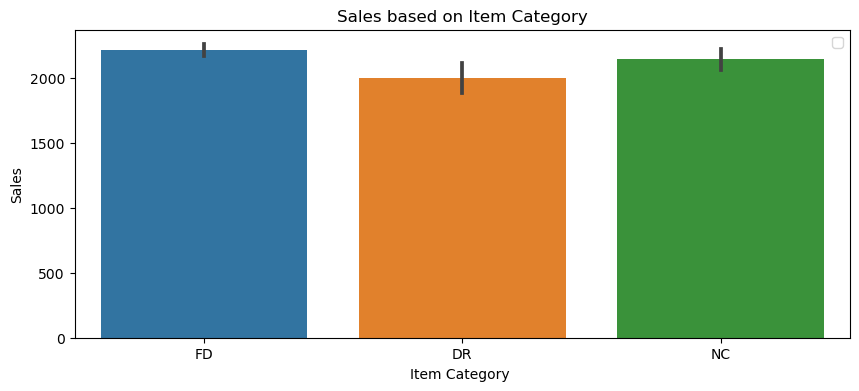

In [69]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=df,x="New_Item_Identifier", y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


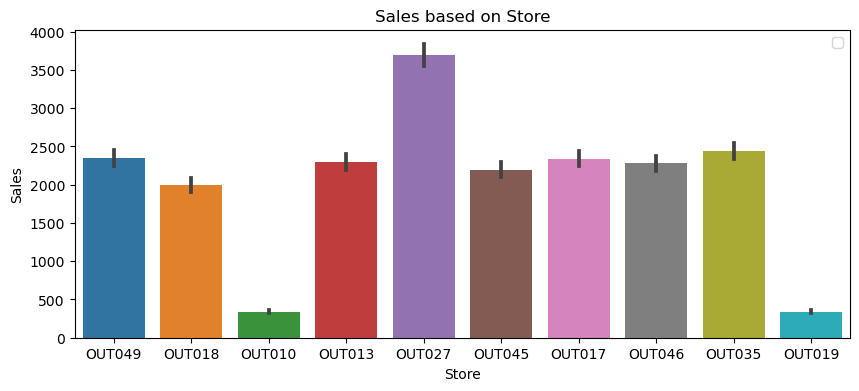

In [70]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


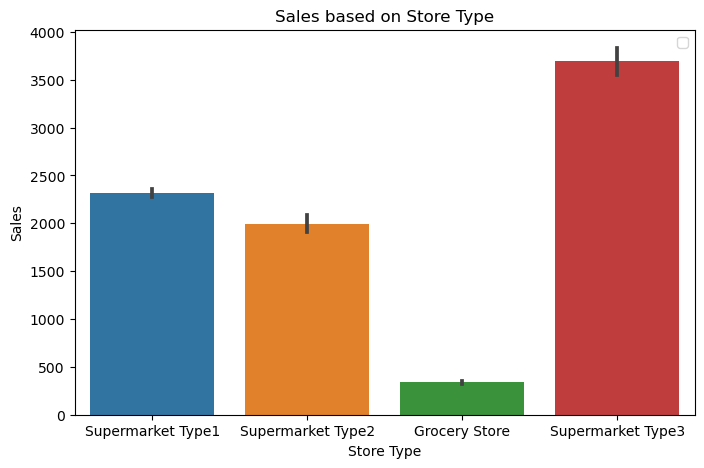

In [71]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


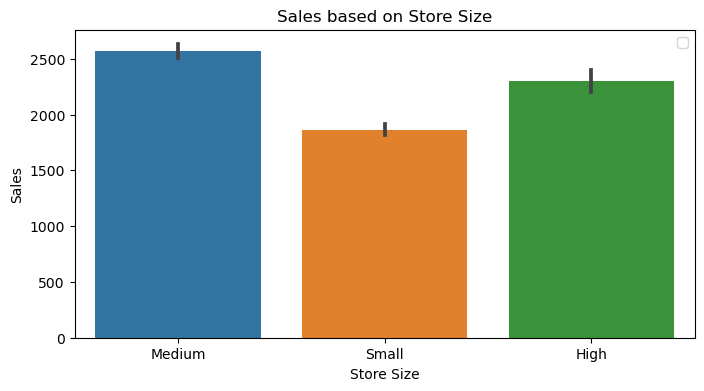

In [72]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


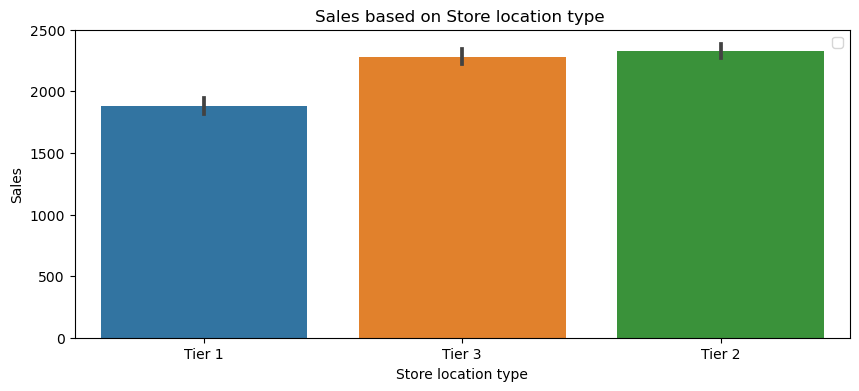

In [73]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Realizations:
    - Item_Type_Combined: Based on Categories, Food has most Sells, But difference is very small.
    - Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
    - Outlet_Type: Most Sells are through SuperMarket Type3 surprisingly not Type1.
    - Outlet_Size: Sells are mostly even in Medium and High size Stores.
    - Outlet_Location_Type: Most sells are through Tier3 and Tier2, Tier2 is slightly higher.

## Multivariate plots.
    - Outlet Type in all Outlet location based on sales.
    - Sales of Item_Type based on Outlet_Type.
    - Outlet_Location_Type of Outlet_Type based on sales.
    - Sales of Outlet_Location_Type based on Item_Type_Combined.

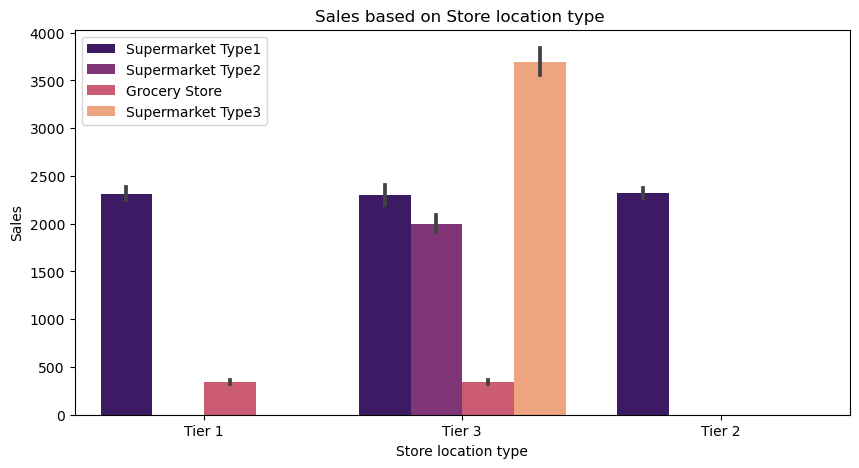

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

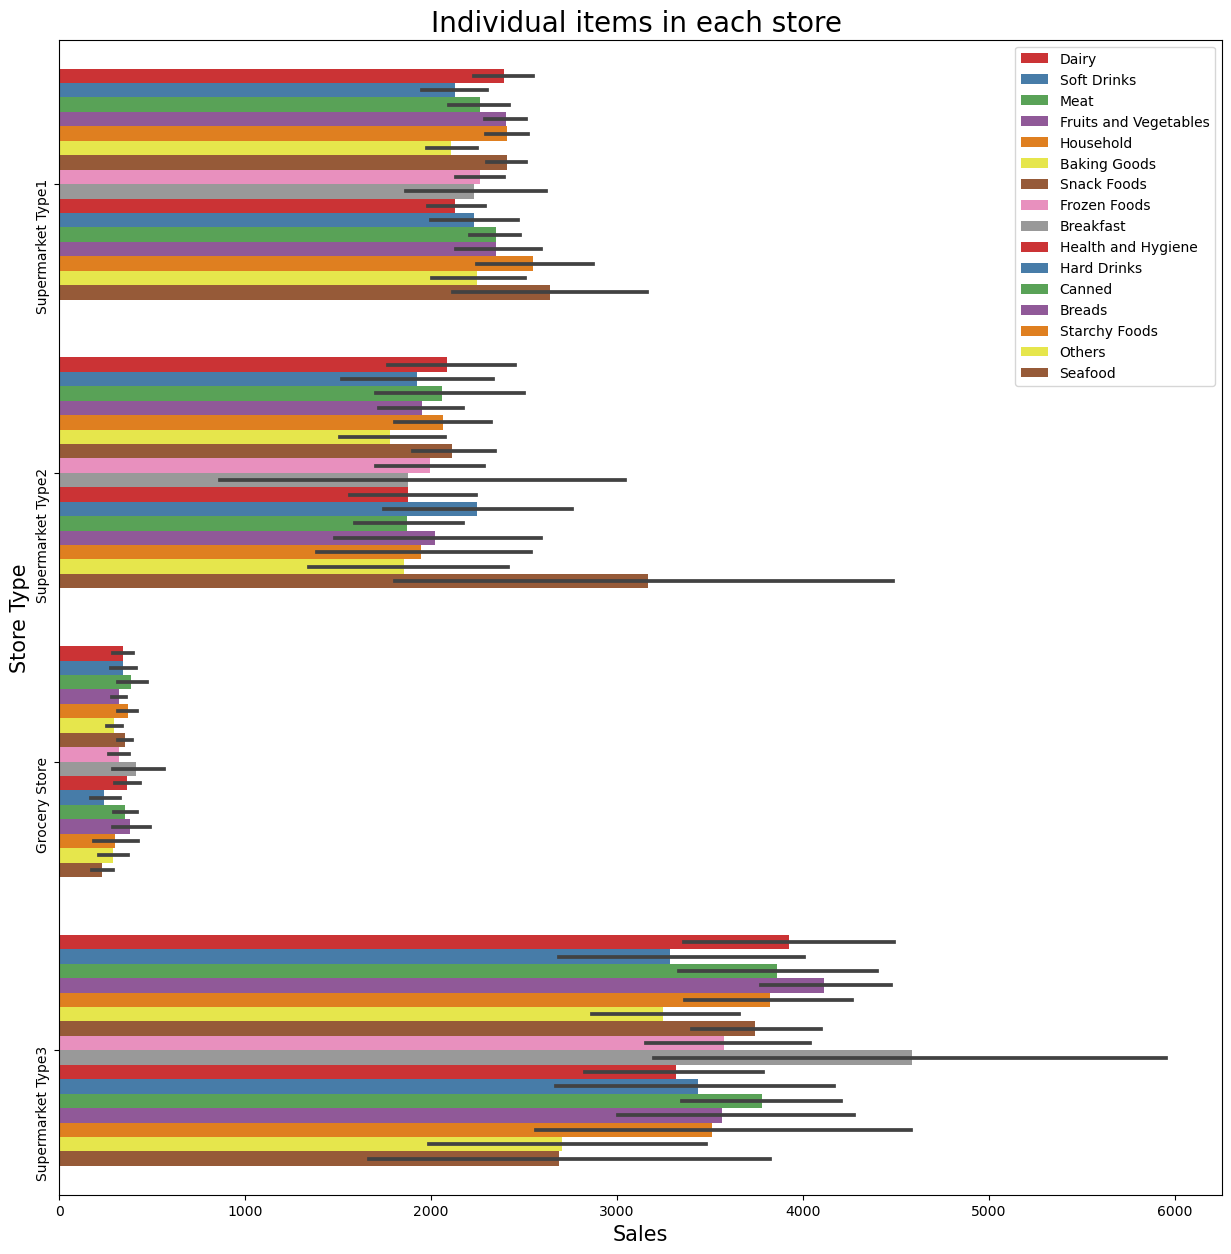

In [75]:
plt.figure(figsize=(15,15))
sns.barplot(data=df,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

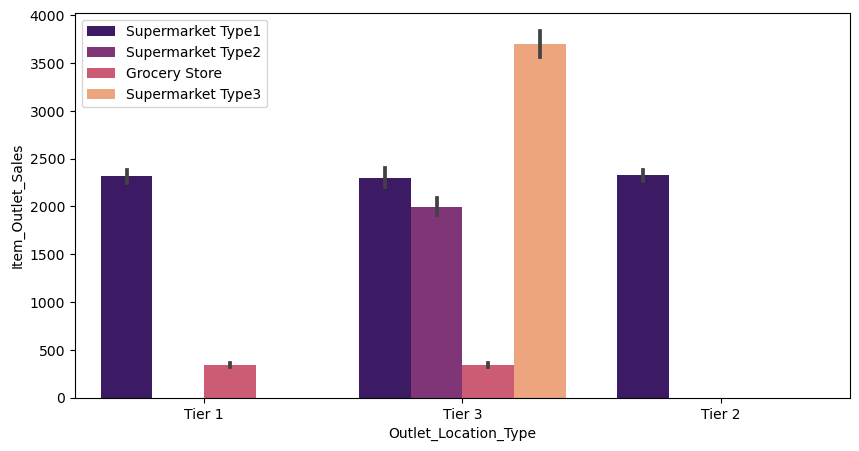

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',data=df,palette='magma')
plt.legend()

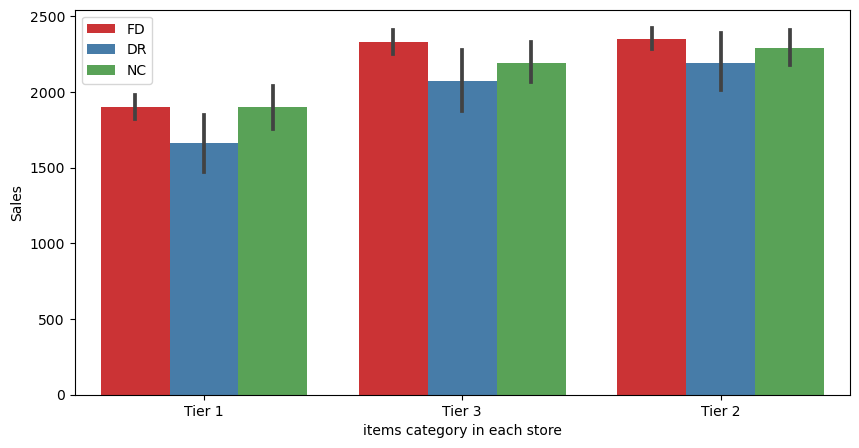

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='New_Item_Identifier',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

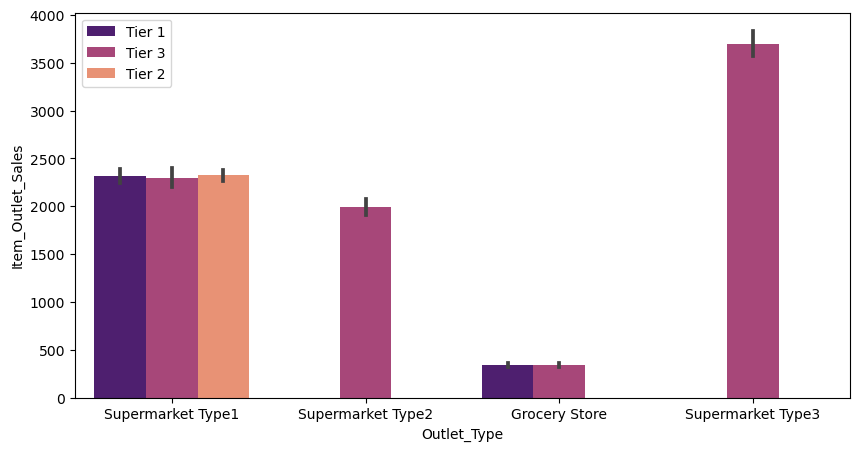

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=df,palette='magma')
plt.legend()

## Realizations:
    - Seafood is the most item_type sold in SuperMarket 1 and 2, Grocery store has less sales.
    - Only Teir3 has all Outlet_Type, and SuperMarket type3 has most sales..
    - Outlet_Location_Type has almost equal sales based on Item_Type_combined.

### Distribution of Item Types

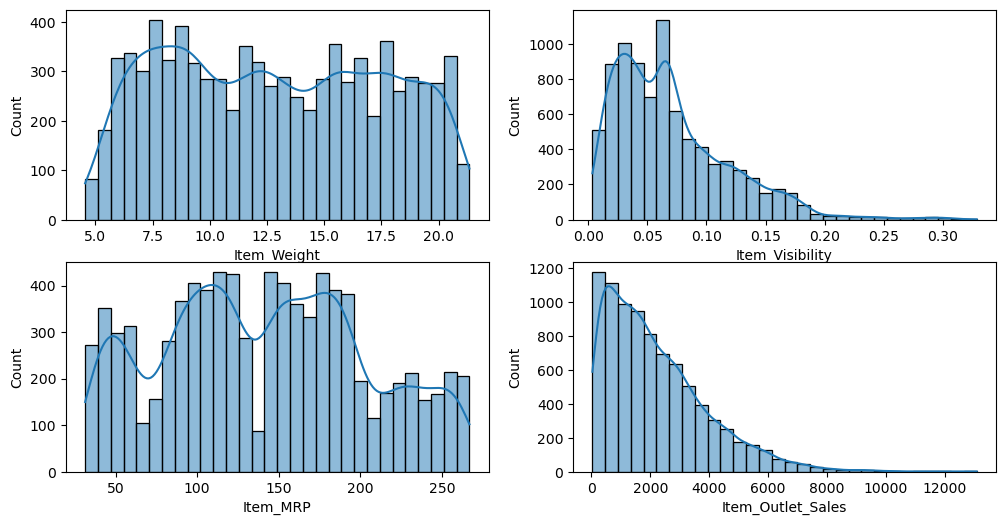

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Item_Weight'], bins=30, kde=True)

plt.subplot(2, 2, 2)
sns.histplot(df['Item_Visibility'], bins=30, kde=True)

plt.subplot(2, 2, 3)
sns.histplot(df['Item_MRP'], bins=30, kde=True)

plt.subplot(2, 2, 4)
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)

plt.show()


### Type of items Available in BigMart

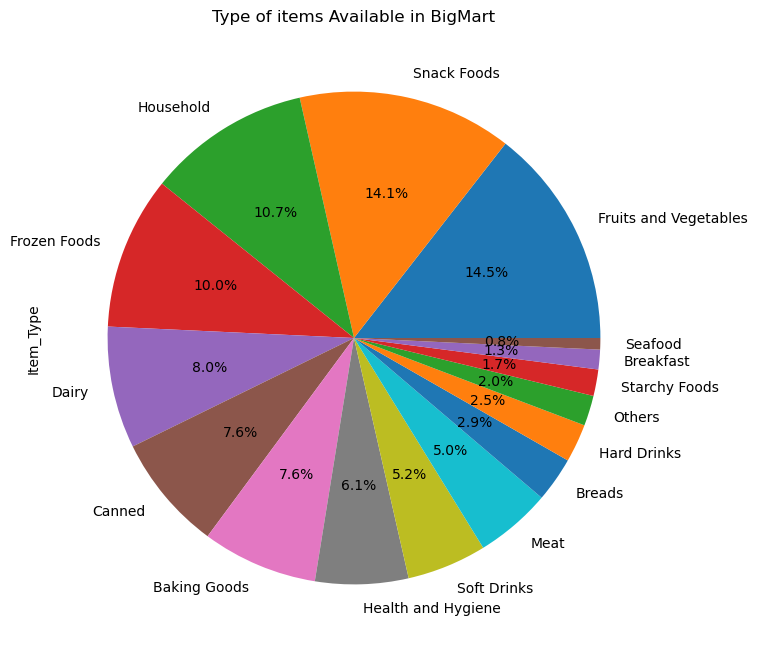

In [80]:
plt.figure(figsize=(12,8))
df['Item_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Type of items Available in BigMart')
plt.show()

## Now will drop those features where we have performed data preprocessing technique and now those columns are not useful for prediction

In [81]:
df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [82]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.066115,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.066115,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [83]:
df.shape

(8518, 11)

In [84]:
df.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
New_Item_Identifier     0
age_of_store            0
dtype: int64

### Will use Log Transformation for Item_Outlet_Sales to convert right skewed into normal distribution

In [85]:
df1=df.copy(deep=True)

In [86]:
df1['Item_Outlet_Sales']=np.log(df['Item_Outlet_Sales'])

In [87]:
df1['Item_Visibility']=np.log(df['Item_Visibility'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

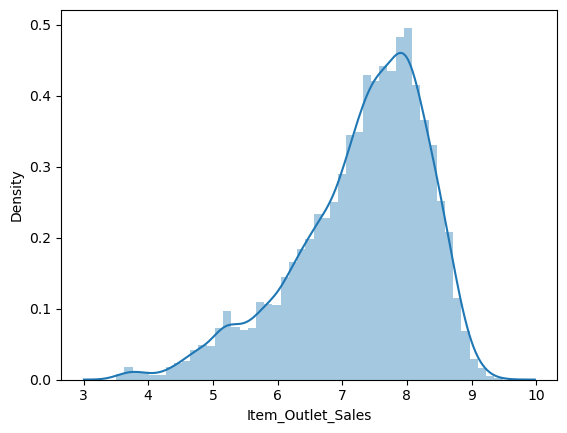

In [88]:
sns.distplot(df1['Item_Outlet_Sales'])

In [89]:
df1.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
New_Item_Identifier     0
age_of_store            0
dtype: int64

#### here I'm performing encoding technique,  Actually encoding techniques are used to convert categorical variables, such as text labels, into numerical values, that can be used as input for a model because most of Machine learning model cannot understand text labels

In [90]:
new_df=pd.get_dummies(columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Identifier'],data=df1,drop_first=True)

In [91]:
new_df.head(3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,-4.132215,Dairy,249.8092,8.225540,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,-3.948780,Soft Drinks,48.2692,6.094524,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,-4.088756,Meat,141.6180,7.648392,14,0,0,1,0,0,0,1,0,0,1,0


In [92]:
new_df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le = LabelEncoder()
new_df['Item_Type'] = le.fit_transform(new_df['Item_Type'])

In [95]:
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,-4.132215,4,249.8092,8.225540,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,-3.948780,14,48.2692,6.094524,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,-4.088756,10,141.6180,7.648392,14,0,0,1,0,0,0,1,0,0,1,0
3,19.20,-2.716360,6,182.0950,6.596300,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,-2.716360,9,53.8614,6.902446,26,0,1,0,0,0,1,1,0,0,0,1


In [96]:
new_df.Item_Type.unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [97]:
new_df.isna().sum()

Item_Weight                      0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Item_Outlet_Sales                0
age_of_store                     0
Item_Fat_Content_Regular         0
Item_Fat_Content_others          0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
New_Item_Identifier_FD           0
New_Item_Identifier_NC           0
dtype: int64

# Split the dataframe into X & y

In [98]:
# Separate object for target feature
y = new_df['Item_Outlet_Sales']

# Separate object for Predictors
X = new_df.drop('Item_Outlet_Sales',axis=1)

In [99]:
X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,-4.132215,4,249.8092,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,-3.948780,14,48.2692,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,-4.088756,10,141.6180,14,0,0,1,0,0,0,1,0,0,1,0
3,19.20,-2.716360,6,182.0950,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,-2.716360,9,53.8614,26,0,1,0,0,0,1,1,0,0,0,1


In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [102]:
X

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,-0.769709,-1.594037,-0.767037,1.746802,-0.138917,-0.737723,-0.480731,1.269363,-1.015380,-0.696796,-0.804527,0.726373,-0.349666,-0.350511,0.625963,-0.480731
1,-1.497241,-1.354151,1.608913,-1.489095,-1.333806,1.355523,-0.480731,1.269363,-1.015380,-0.696796,1.242966,-1.376702,2.859874,-0.350511,-1.597538,-0.480731
2,0.995310,-1.537204,0.658533,0.009700,-0.138917,-0.737723,-0.480731,1.269363,-1.015380,-0.696796,-0.804527,0.726373,-0.349666,-0.350511,0.625963,-0.480731
3,1.361228,0.257540,-0.291847,0.659593,-0.019429,1.355523,-0.480731,-0.787797,0.984853,-0.696796,1.242966,-1.376702,-0.349666,-0.350511,0.625963,-0.480731
4,-0.849350,0.257540,0.420938,-1.399307,1.294948,-0.737723,2.080163,-0.787797,-1.015380,-0.696796,1.242966,0.726373,-0.349666,-0.350511,-1.597538,2.080163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,1.694860,0.564502,-0.529442,0.607199,0.100060,1.355523,-0.480731,-0.787797,0.984853,-0.696796,-0.804527,0.726373,-0.349666,-0.350511,0.625963,-0.480731
8514,-1.293834,0.058564,1.371318,1.180233,1.294948,-0.737723,-0.480731,-0.787797,-1.015380,-0.696796,1.242966,0.726373,-0.349666,-0.350511,0.625963,-0.480731
8515,-0.489889,-0.567307,0.183343,-0.897385,-0.736361,-0.737723,2.080163,-0.787797,0.984853,1.435140,-0.804527,0.726373,-0.349666,-0.350511,-1.597538,2.080163
8516,-1.219574,1.286550,1.371318,-0.608207,-1.333806,1.355523,-0.480731,1.269363,-1.015380,-0.696796,1.242966,-1.376702,2.859874,-0.350511,0.625963,-0.480731


In [103]:
y.head()

0    8.225540
1    6.094524
2    7.648392
3    6.596300
4    6.902446
Name: Item_Outlet_Sales, dtype: float64

In [104]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (8518, 16) 
y Shape = (8518,)


# Train Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [106]:
X_train.shape,y_train.shape

((6814, 16), (6814,))

In [107]:
df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14


In [108]:
df.shape

(8518, 11)

In [109]:
y_train.shape,y_test.shape

((6814,), (1704,))

# Build the Regression Algorithms

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
# Linear Regression
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.5379158016809011
rmse_test =  0.5384827020837943
train_score =  0.7228641560675007
test_score =  0.7079717893053901


In [112]:
# Lasso Regressor
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.6455760289680166
rmse_test =  0.6365057059918443
train_score =  0.600829086747142
test_score =  0.5919758240563959


In [113]:
# Ridge Regressor
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.5377949452152272
rmse_test =  0.5382385683342849
train_score =  0.7229886733094314
test_score =  0.708236524942669


In [114]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  1.863630371643444e-17
rmse_test =  0.7685512860825635
train_score =  1.0
test_score =  0.4051232422030636


In [115]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.20739468914946793
rmse_test =  0.5645897451232631
train_score =  0.9588035913571792
test_score =  0.6789687830826923


In [116]:
# Suport Vector Regressor
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.509082354317077
rmse_test =  0.5333194249429775
train_score =  0.7517780499300185
test_score =  0.7135452038290666


#### boosting Techniques

In [117]:
# Ada boosting
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(X_train,y_train)
y_train_pred = abr.predict(X_train)
y_test_pred = abr.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.6305008859070711
rmse_test =  0.6265170800381985
train_score =  0.6192538700888814
test_score =  0.604681513319524


In [118]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.5046724412500555
rmse_test =  0.5261905291247931
train_score =  0.7560598565108965
test_score =  0.7211521195223469


In [119]:
# !pip install xgboost

In [120]:
# XGBoosting
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgbr.fit(X_train,y_train)
y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.3198322646589051
rmse_test =  0.5711079639007858
train_score =  0.9020264957605549
test_score =  0.6715133482821314


In [121]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.47734445996374736
rmse_test =  0.47145334867960537
train_score =  0.7817632585551421
test_score =  0.776149152237621


 #### First we want to build the base model and which ever model was giving me best accuracy based on that we want to perfrom Hypertuning technique

# KNN Hyperparameters

In [123]:
n_neighbors = [3, 5, 7, 9]     # Number of neighbors
weights = ['uniform','distance'] # Weighting scheme
algorithm = ['auto','ball_tree','kd_tree','brute']
p = [1, 2,3,4,5]                         # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
leaf_size = [10,20,30,40,50]

In [124]:
param_grid = {
    'n_neighbors':n_neighbors ,          # Number of neighbors
    'weights': weights,   # Weighting scheme
    'algorithm' : algorithm,
    'p': p,                          # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
    'leaf_size' : leaf_size,
}

In [125]:
from sklearn.model_selection import RandomizedSearchCV

knn_model = RandomizedSearchCV(estimator = neigh,param_distributions = param_grid,cv=4,random_state = 0)

In [126]:
knn_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'n_neighbors': [3, 5, 7, 9],
                                        'p': [1, 2, 3, 4, 5],
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [127]:
# best Parameter
knn_model.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 9,
 'leaf_size': 10,
 'algorithm': 'ball_tree'}

In [128]:
neigh = KNeighborsRegressor(n_neighbors = 9,weights='distance',p=1,algorithm= 'ball_tree',leaf_size= 10)
neigh.fit(X, y)
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.0
rmse_test =  0.0
train_score =  1.0
test_score =  1.0


# Random Forest Hyperparameters

In [129]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,600,100)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# The depth of the tree max_depth
max_depth = [i for i in range(5,30,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,100]
# Min no of samples required to each leaf to split                        ---- Pruning
min_samples_leaf = [1,2,5,10]

In [130]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [131]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [132]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0)

In [133]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [134]:
RF = RandomForestRegressor(n_estimators = 400,min_samples_split = 10,min_samples_leaf =5,max_features ='sqrt',max_depth = 23)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.429829939677153
rmse_test =  0.5302553412723121
train_score =  0.8230472073098092
test_score =  0.7168272896969059


# Feature Selection Technique

In [135]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [136]:
print(selection.feature_importances_)

[0.04917092 0.05305087 0.03638859 0.33760284 0.05546486 0.01178951
 0.00351023 0.13459784 0.1663729  0.00690817 0.00428281 0.08387532
 0.01193834 0.03388065 0.00767196 0.00349419]


In [137]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

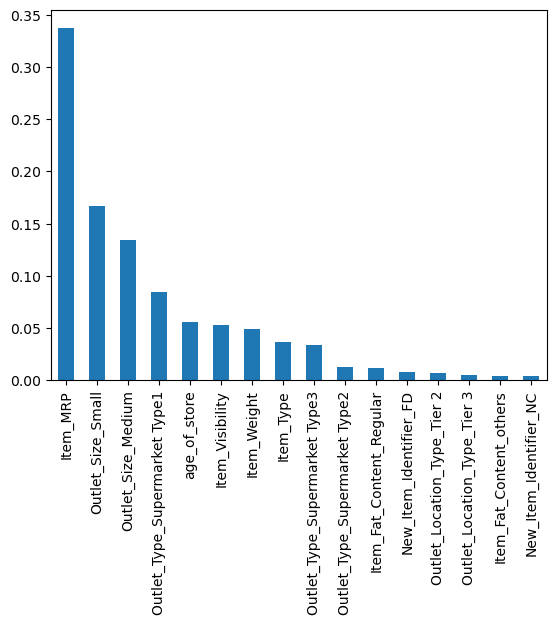

In [138]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [139]:
X_imp = X[feat_importances.nlargest(9).index]

In [140]:
X_imp

,Item_MRP,Outlet_Size_Small,Outlet_Size_Medium,Outlet_Type_Supermarket Type1,age_of_store,Item_Visibility,Item_Weight,Item_Type,Outlet_Type_Supermarket Type3
0,1.746802,-1.015380,1.269363,0.726373,-0.138917,-1.594037,-0.769709,-0.767037,-0.350511
1,-1.489095,-1.015380,1.269363,-1.376702,-1.333806,-1.354151,-1.497241,1.608913,-0.350511
2,0.009700,-1.015380,1.269363,0.726373,-0.138917,-1.537204,0.995310,0.658533,-0.350511
3,0.659593,0.984853,-0.787797,-1.376702,-0.019429,0.257540,1.361228,-0.291847,-0.350511
4,-1.399307,-1.015380,-0.787797,0.726373,1.294948,0.257540,-0.849350,0.420938,-0.350511
...,...,...,...,...,...,...,...,...,...
8513,0.607199,0.984853,-0.787797,0.726373,0.100060,0.564502,1.694860,-0.529442,-0.350511
8514,1.180233,-1.015380,-0.787797,0.726373,1.294948,0.058564,-1.293834,1.371318,-0.350511
8515,-0.897385,0.984853,-0.787797,0.726373,-0.736361,-0.567307,-0.489889,0.183343,-0.350511
8516,-0.608207,-1.015380,1.269363,-1.376702,-1.333806,1.286550,-1.219574,1.371318,-0.350511


### Now i will build the model by keeping top featues that are helping to target variable

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [142]:
rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 10)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(max_depth=23,
                                                   max_features='sqrt',
                                                   min_samples_leaf=5,
                                                   min_samples_split=10,
                                                   n_estimators=400),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=10)

In [143]:
# best Parameter
rf_model.best_params_

{'n_estimators': 500,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 11}

In [144]:
RF = RandomForestRegressor(n_estimators = 500,min_samples_split = 15,min_samples_leaf =5,max_features ='sqrt',max_depth = 11)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.4621179003743233
rmse_test =  0.5199786568673483
train_score =  0.7936546903906491
test_score =  0.736936156740648
